# Objetivo del Notebook

El notebook actual tiene como principal objetivo preprocesar el conjunto de datos del que disponemos, a fin de poder utilizarlo de una manera optima para el desarrollo de un modelo de clasificacion multiclase.



---

In [44]:
## Importo las librerias a utilizar en esta celda
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
import joblib

In [2]:
# Cargo el dataset de entrenamiento en memoria
train_data__route = "../data/raw/train.csv"
train_data_df = pd.read_csv(train_data__route, low_memory=False)

# 5 primeros registros del dataset
train_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 5 ultimos registros del dataset
train_data_df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Nuestro dataset de entrenamiento cuenta con un total de 42000 registros, y hasta 785 caracteristicas para cada uno de ellos. Cada una de estas caracteristicas representa un pixel de una imagen, y seria conveniente aplicar Analisis de Componentes Principales o similares para lograr reducir el numero de caracteristicas para cada imagen.

<Figure size 640x480 with 0 Axes>

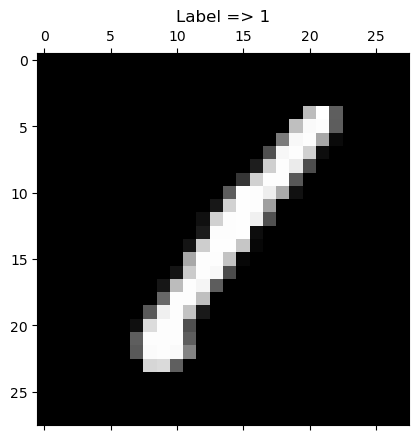

In [5]:
# Muestro la primera imagen
image = train_data_df.loc[0].values

# El primer valor contiene la etiqueta de la propia imagen
image_pixels = image[1:]
# Convierto el registro de la imagen en una matriz de dimensiones (28, 28)
image_array = image_pixels.reshape((28, 28))
plt.figure()
plt.matshow(image_array, cmap = 'gray')
plt.title(f'Label => {image[:1][0]}')
plt.show()

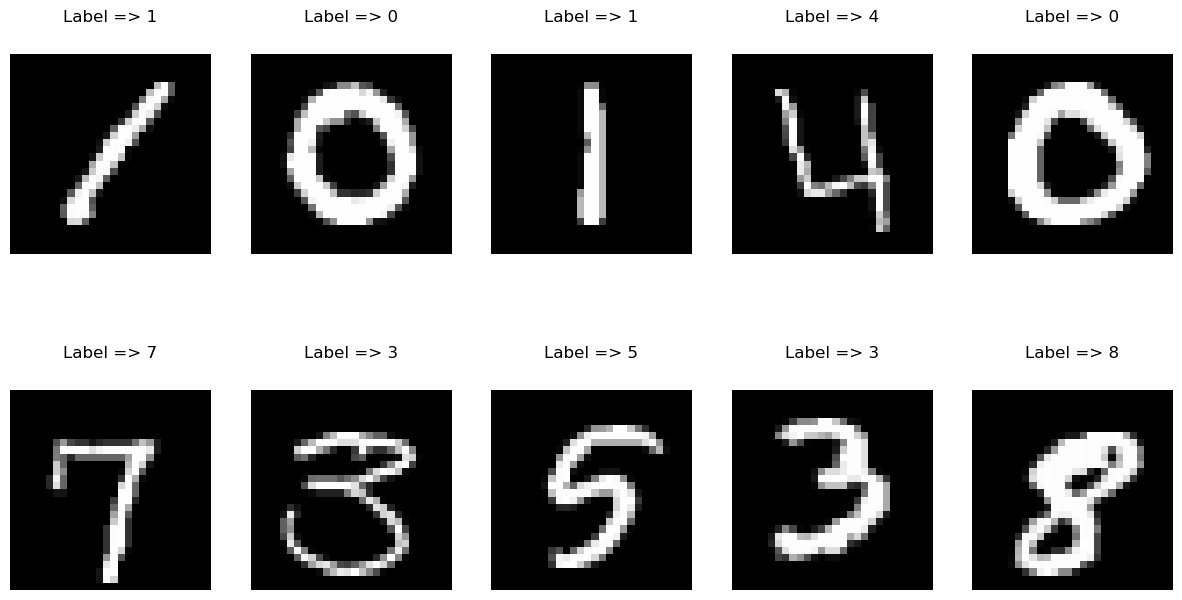

In [6]:
# Muestro las imagenes de los primeros 10 registros
firsts_regs = train_data_df[:11].values
cont_row = 0
cont_col = 0

fig, axs = plt.subplots(2, 5, figsize = (15, 8))
for row in firsts_regs:
    row_pixels = row[1:]
    row_pixels_array = np.array(row_pixels).reshape(28, 28)
    if cont_col == 5:
        cont_col = 0
        cont_row = 1
        axs[cont_row, cont_col].matshow(row_pixels_array, cmap = 'gray')
        axs[cont_row, cont_col].axis('off')
        axs[cont_row, cont_col].set_title(f'Label => {row[:1][0]}')
   
    else:
        axs[cont_row, cont_col].matshow(row_pixels_array, cmap = 'gray')
        axs[cont_row, cont_col].axis('off')
        axs[cont_row, cont_col].set_title(f'Label => {row[:1][0]}')
        cont_col += 1
    
plt.show()

# Division del conjunto de datos

Los datos de los que disponemos son, en esencia, matrices numericas, de dimensiones 28x28. Voy a entrenar un primer modelo base, basado en TensorFlow, que me ayuda a generar una aproximacion al conjunto de datos. 

In [7]:
X_entrenamiento = []
y_entrenamiento = []

# Cambio las dimensiones de X_entrenamiento
for i, row in train_data_df.iterrows():
    label = row[:1][0]
    row_pixels = row[1:]
    row_pixels_array = np.array(row_pixels).reshape(28, 28)

    # Registro los valores para la fila iterada
    X_entrenamiento.append(row_pixels_array)
    y_entrenamiento.append(label)


X_entrenamiento = np.array(X_entrenamiento)
y_entrenamiento = np.array(y_entrenamiento)

# Randomizo el conjunto de datos
X_entrenamiento, y_entrenamiento = shuffle(X_entrenamiento, y_entrenamiento)

# Divido el dataset en subsets de entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X_entrenamiento, y_entrenamiento, test_size=0.15)

C:\Users\David\AppData\Local\Temp\ipykernel_24060\2558644878.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = row[:1][0]


In [8]:
X_train.shape

(35700, 28, 28)

In [9]:
X_val.shape

(6300, 28, 28)

In [10]:
y_train.shape

(35700,)

In [11]:
y_val.shape

(6300,)

# Desarrollo del modelo de clasificacion

Para el objetivo de esta competicion, entrenare una red neuronal con TensorFlow.

In [12]:
num_classes = 10

model = models.Sequential([
  layers.Input((28, 28, 1)),
  layers.Rescaling(1./255),
  layers.Conv2D(28, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(28, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(28, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 28)     │         7,084 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 28)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 28)       │         7,084 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 252)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,290 (122.23 KB)

 Trainable params: 31,290 (122.23 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
## Entreno la red neuronal

epochs=20
history = model.fit(
  X_train,
  y_train,
  validation_data=(X_val, y_val),
  epochs=epochs
)

Epoch 1/20
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9975 - loss: 0.0071 - val_accuracy: 0.9883 - val_loss: 0.0696
Epoch 2/20
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9840 - val_loss: 0.0784
Epoch 3/20
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9979 - loss: 0.0066 - val_accuracy: 0.9905 - val_loss: 0.0591
Epoch 4/20
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9873 - val_loss: 0.0746
Epoch 5/20
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9987 - loss: 0.0036 - val_accuracy: 0.9900 - val_loss: 0.0709
Epoch 6/20
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9892 - val_loss: 0.0669
Epoch 7/20
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9977 - loss: 0.0070 - val_accuracy: 0.9863 - val_loss: 0.0823
Epoch 8/20
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9988 - loss: 0.0039 - 

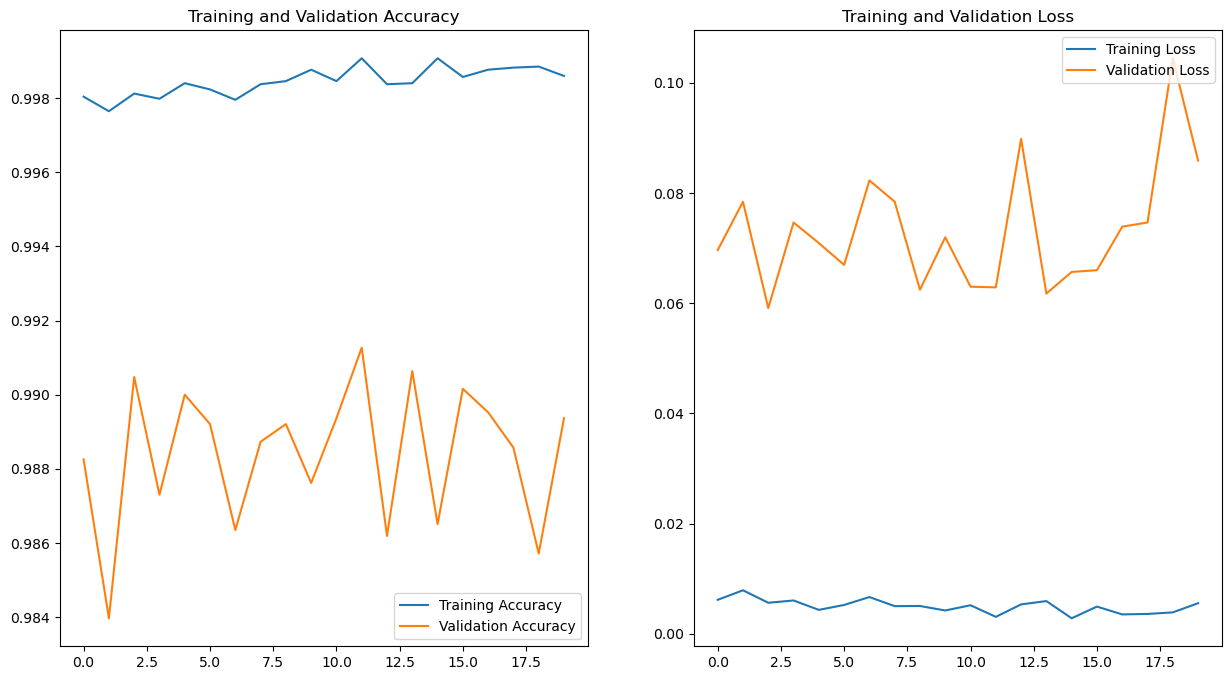

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Evaluacion del modelo

Para el dataset que nos otorga Kaggle, no tenemos disponibles las etiquetas de los ejemplos contenidos en el subset de testing, por lo que no podemos evaluar el rendimiento del modelo de manera directa.

# Inferencias con el modelo

In [30]:
## Cargo en memoria el conjunto de testing
test_data__route = '../data/raw/test.csv'
test_data_df = pd.read_csv(test_data__route, low_memory = False)

# Primeros 5 registros
test_data_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
test_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [32]:
# Estos datos no contienen la variable objetivo (etiqueta), por lo que puedo operar directamente con ellos.
test_data_array = []

for i, row in test_data_df.iterrows():
    test_data_array.append(np.array(row).reshape(28, 28))
    
X_test = np.array(test_data_array)

In [33]:
X_test.shape

(28000, 28, 28)

In [34]:
## Genero predicciones con el modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print('Predicciones inferidas correctamente!')

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicciones inferidas correctamente!


In [35]:
# Primeras 10 etiquetas inferidas
y_pred_classes[:10]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3], dtype=int64)

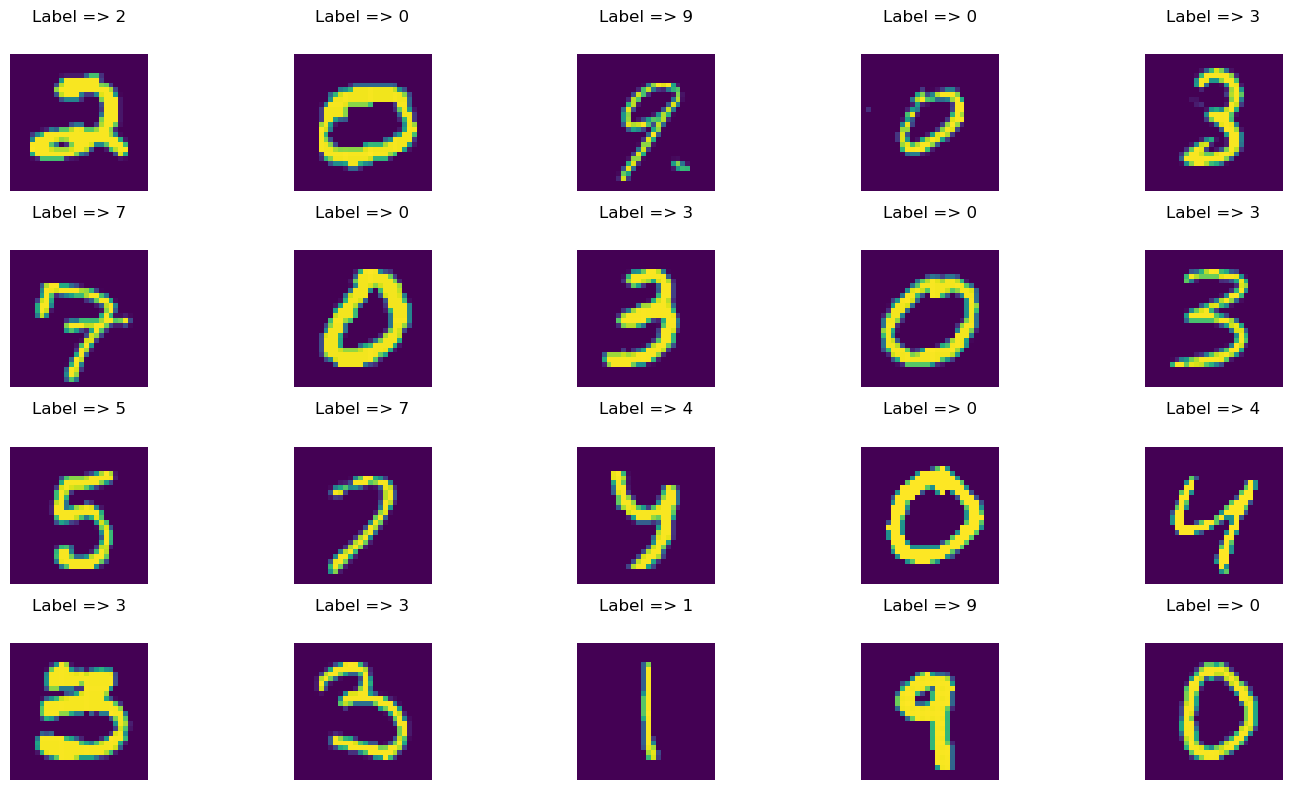

In [36]:
## Muestro las 10 primeras imagenes del subset de testing
firsts_10classes = y_pred_classes[:20]
firsts_10_images = X_test[:20]

row = 0
column = 0
fig, axs = plt.subplots(4, 5, figsize = (15, 8))
for index, image in enumerate(firsts_10_images):
    if column == 5:
        row +=1
        column = 0
        
    image_array = np.array(image).reshape(28, 28)
    axs[row, column].matshow(image_array)
    axs[row, column].set_title('Label => {}'.format(firsts_10classes[index]))
    axs[row, column].axis('off')
    column +=1


plt.tight_layout()
plt.show()

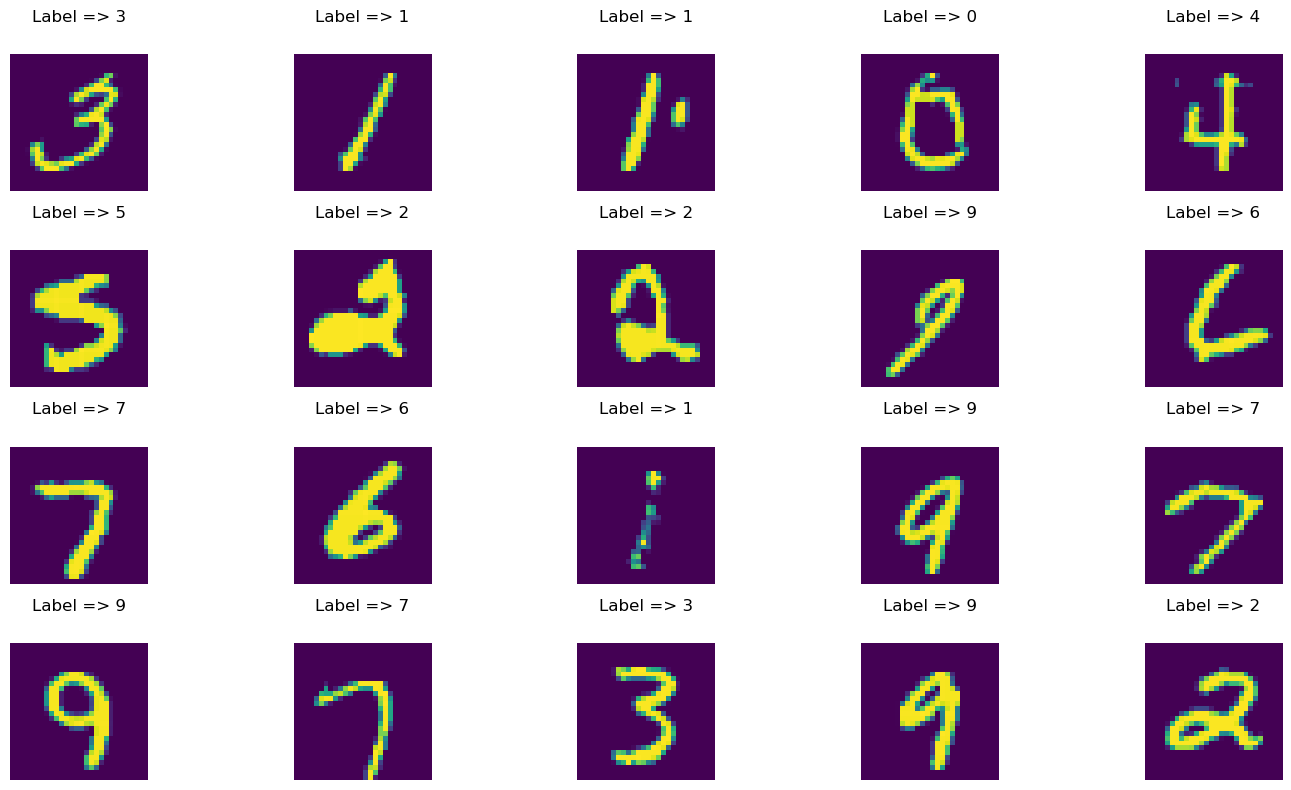

In [37]:
## Muestro las 10 ultimas imagenes del subset de testing
firsts_10classes = y_pred_classes[-20:]
firsts_10_images = X_test[-20:]

row = 0
column = 0
fig, axs = plt.subplots(4, 5, figsize = (15, 8))
for index, image in enumerate(firsts_10_images):
    if column == 5:
        row +=1
        column = 0
        
    image_array = np.array(image).reshape(28, 28)
    axs[row, column].matshow(image_array)
    axs[row, column].set_title('Label => {}'.format(firsts_10classes[index]))
    axs[row, column].axis('off')
    column +=1
        
plt.tight_layout()
plt.show()

# Resultados

En una primera instancia, no considero necesario ningun paso adicional en el modelo. Es cierto que se trataba de un modelo base, pero se han obtenido unos buenos resultados.

Tras generar predicciones para el conjunto de testing, y representar un pequenio grupo de las imagenes del conjunto de testing, con las etiquetas que el modelo ha asignado a cada imagenm, considero razonable hacer submit a la Kaggle Comp. con las predicciones actuales.

# Genero el documento con los resultados del modelo

In [38]:
index_col = [item for item in range(1, len(test_data_df)+1)]
print('Primer elemento de la columna ImageId ==>', index_col[0])
print('Ultimo elemento de la columna ImageId ==>', index_col[-1])

Primer elemento de la columna ImageId ==> 1
Ultimo elemento de la columna ImageId ==> 28000


In [39]:
y_pred_classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [40]:
submission_df = pd.DataFrame(data = index_col,
                             columns = ['ImageId'])

# Inserto la columna con las etiquetas de los ejemplos
submission_df['Label'] = y_pred_classes

# 5 primeros registros
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [41]:
## Guardo el archivo con el resultado de las predicciones
result__route = "../results/"
if not os.path.exists(result__route):
    os.mkdir(result__route)

submission_df.to_csv(os.path.join(result__route, 'submission_result.csv'), index = False)
print('Documento generado con exito.')

Documento generado con exito.


In [49]:
## Guardo el modelo entrenado
model__route = "../models/"

model.save(os.path.join(model__route, 'CNN_model.keras'))
print('Modelo guardado con exito.')

Modelo guardado con exito.
